# Example IV: Harmonically trapped 1D fermions with effective interaction

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read full energy dataset.
edata = pd.read_csv("exIV_energies.csv")

# Non-interacting energy for a single species.
e0 = lambda N: N**2/2

## GS energy: Convergence with basis size

Benchmark data digitized from Fig. 3 of [this paper](https://iopscience.iop.org/article/10.1088/1367-2630/17/11/115001).

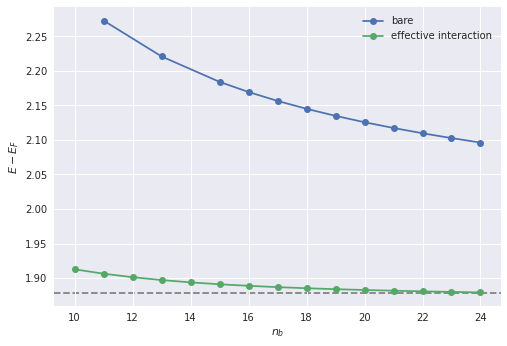

In [81]:
from scipy.interpolate import interp1d

param = {
    'n_part' : [3,1],
    'dimension' : 1,
    'lambda' : 0.0,
    'coupling' : 5.0
}
e0cm = e0(param['n_part'][0]) + e0(param['n_part'][1])

labels = ["bare", "effective interaction"]
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()

    ax.set_xlabel('$n_b$')
    ax.set_ylabel("$E - E_F$")
    
    for i, int_type in enumerate(['bare', 'effective_relative']):
        sub = edata[
            (edata['N'] == 0) &
            (edata['coupling'] == param['coupling']) &
            (edata['lambda'] == param['lambda']) &
            (edata['interaction_type'] == int_type)
        ].sort_values(by="n_basis")   
        ax.plot(sub["n_basis"], sub["spectrum"]-e0cm, label=labels[i], marker='o')
        
    # Benchmark.
    grin = pd.read_csv('benchmark_data/grining_31.dat')
    grin_energy_func = interp1d(grin['g'], grin['e'])
    ax.axhline(grin_energy_func(param["coupling"]), ls='--', color='gray', zorder=0, marker='')
    
    ax.legend(loc='upper right')

## Lower spectrum: Benchmark vs. Literature

Benchmark data digitized from Figs. 3 and 4 of [this paper](https://iopscience.iop.org/article/10.1088/1367-2630/17/11/115001).

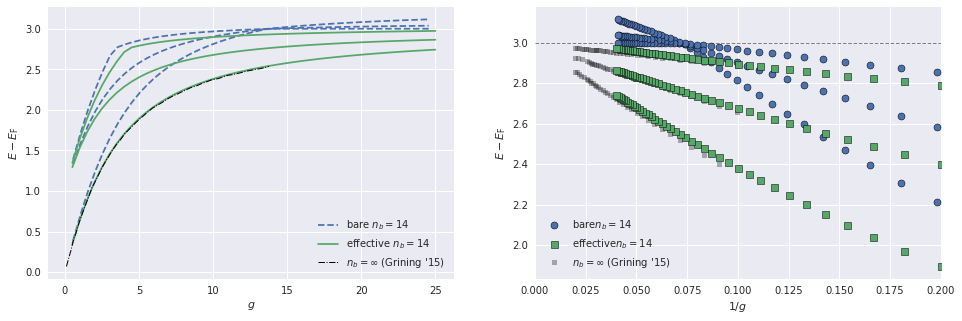

In [82]:
param = {
    'n_basis' : 14,
    'n_part' : [3,1],
    'dimension' : 1,
    'lambda' : 0.0
}
e0cm = e0(param['n_part'][0]) + e0(param['n_part'][1])

n_states = 3
df = edata[
    (edata["n_up"]==param["n_part"][0]) &
    (edata["n_down"]==param["n_part"][1]) &
    (edata["n_basis"]==param["n_basis"]) &
    (edata["N"]<n_states) &
    (edata["lambda"]==param["lambda"])
]

colors = ["#4c72b0", "#55a868"]
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    
    for i, int_type in enumerate(["bare", "effective_relative"]):
        for n_state in range(n_states):
            g_low, g_high = 0.0, 25.0
            sub = df[
                (df["N"]==n_state) &
                (df["coupling"]>=g_low) &
                (df["coupling"]<=g_high) &
                (df["interaction_type"]==int_type) 
            ].sort_values(by="coupling")
            
            ls = '--' if int_type=='bare' else '-'
            lab = '' if n_state else ('bare' if int_type=='bare' else 'effective') + ' $n_b={:d}$'.format(param['n_basis'])
            ax[0].plot(
                sub["coupling"], sub["spectrum"].values.real-e0cm, 
                ls=ls, marker='', color=colors[i],
                label=lab
            )

        # Inverse.
        g_low, g_high = 5.0, 25.0
        sub = df[
            (df["coupling"]>=g_low) &
            (df["coupling"]<=g_high)&
            (df["interaction_type"]==int_type) 
        ].sort_values(by="coupling")
        lab = 'bare' if int_type=='bare' else 'effective'
        ax[1].plot(
            1/sub["coupling"], sub["spectrum"].values.real-e0cm, 
            ls='', marker='s' if i else 'o', color=colors[i],
            label=lab + '$n_b={:d}$'.format(param['n_basis']), mew=0.5, mec='black' 
        )

    # Extrapolated comparison.
    grin = pd.read_csv('benchmark_data/grining_31.dat')
    line = ax[0].plot(grin['g'], grin['e'],
        marker='', ls='-.', lw=1, color='black',
        label='$n_b = ∞$ (Grining \'15)'
    )
    ax[1].axhline(e0(sum(param['n_part']))-e0cm, ls='--', color='gray', zorder=1, marker='', lw=1)
    
    grin = pd.read_csv('benchmark_data/grining_31_inv.dat')
    ax[1].plot(grin['gm1'], grin['e']-e0cm, ls='',
        marker='s', color='black', alpha=0.3, zorder=1, markersize=5,
        label='$n_b = ∞$ (Grining \'15)'
    )
    
    ax[0].set_xlabel('$g$')
    ax[0].set_ylabel('$E - E_{\\rm F}$')
    ax[0].legend(loc='lower right')

    ax[1].set_xlabel('$1/g$')
    ax[1].set_xlim(0, 0.2)
    ax[1].set_ylabel('$E - E_{\\rm F}$')
    ax[1].legend(loc='lower left')

## GS energy: Benchmark to experiment

In [68]:
# Styles for benchmark data.
styles = {
    'exp' : {'marker':'d', 'color':'orange', 'alpha':1, 'label':'experiment'},
    'fci' : {'marker':'s', 'color':'black', 'alpha':1, 'label':'$n_b = ∞$ (Grining \'15)'},
}

#### Repulsive couplings, polaron energies

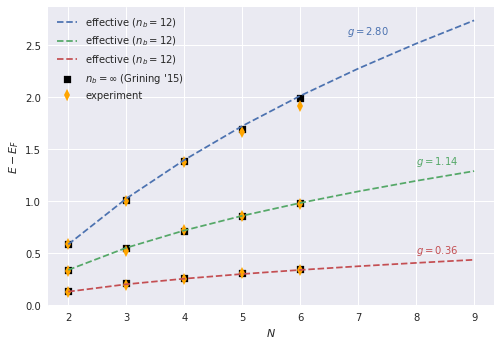

In [87]:
from copy import copy

param = {
    'n_basis' : 12,
    'dimension' : 1,
    'lambda' : 0.0,
    'interaction_type' : 'effective_relative'
}
n_parts = [[1,1], [2,1], [3,1], [4,1], [5,1], [6,1], [7,1], [8,1]]

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    # ---
    # Repulsive, energy.
    label_pos = [(6.8,2.6), (8,1.35), (8,0.5)]
    for j, coupling in enumerate([2.8, 1.14, 0.36]):
        df = pd.DataFrame()
        x_np = []
        for k, n_part in enumerate(n_parts):
            sub = copy(edata[
                (edata["N"]==0) &
                (edata["n_up"]==n_part[0]) &
                (edata["n_down"]==n_part[1]) &
                (edata["n_basis"]==param["n_basis"]) &
                (edata["coupling"]==coupling) &
                (edata["interaction_type"]==param["interaction_type"]) &
                (edata["lambda"]==param["lambda"])
            ])
            x_np.append(np.sum(n_part))
            sub['n_part'] = x_np[-1]
            sub['e_free'] = e0(n_part[0]) + e0(n_part[1])
            df = df.append(sub, ignore_index=True)

        # Make energy.
        df = df.sort_values(by='n_part')
        y = df['spectrum'] - df['e_free']
        line = ax.plot(
            x_np, y, 
            ls='--', zorder=10, 
            label='effective ($n_b = {:d}$)'.format(param["n_basis"])
        )
        ax.text(*label_pos[j], '$g={:.2f}$'.format(coupling), color=line[0].get_color())

    # Compare to exp / FCI.
    p_exp = pd.read_csv('benchmark_data/ZUERN_polaron.txt', sep='\s+', header=0)
    ax.errorbar(
        p_exp['N']+1, p_exp['Delta_E'], yerr=p_exp['E_error'],
        **styles['exp'], markeredgecolor='black', lw=0.5, ls='', markersize=8
    )

    p_fci = pd.read_csv('benchmark_data/fci_polaron.dat', sep=', ', header=0, engine='python')
    ax.scatter(
        p_fci['n'], p_fci['e'], 
        **styles['fci'], 
        edgecolor='black', lw=0.25
    )
    
    ax.set_xlabel("$N$")
    ax.set_ylabel("$E-E_F$")
    ax.legend(loc='upper left')

#### Attractive coupling, separation energies

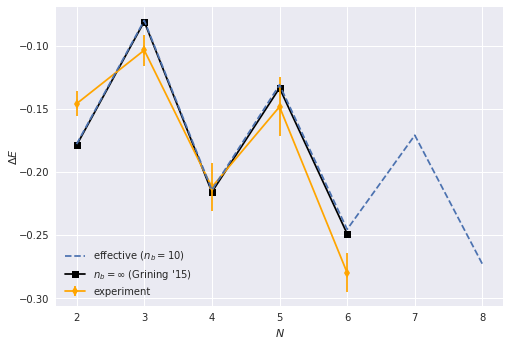

In [84]:
from copy import copy

param = {
    'n_basis' : 10,
    'dimension' : 1,
    'lambda' : 0.0,
    'interaction_type' : 'effective_relative',
    'coupling' : -0.4
}
n_parts = [[1,0], [1,1], [2,1], [2,2], [3,2], [3,3], [4,3], [4,4]]

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    for j, nb in enumerate([10]):
        df = pd.DataFrame()
        x_np, e_free = [], []
        for k, n_part in enumerate(n_parts):
            sub = copy(edata[
                (edata["N"]==0) &
                (edata["n_up"]==n_part[0]) &
                (edata["n_down"]==n_part[1]) &
                (edata["n_basis"]==param["n_basis"]) &
                (edata["coupling"]==param["coupling"]) &
                (edata["interaction_type"]==param["interaction_type"]) &
                (edata["lambda"]==param["lambda"])
            ])
            x_np.append(np.sum(n_part))
            sub['n_part'] = x_np[-1]
            df = df.append(sub, ignore_index=True)
            e_free.append(e0(n_part[0]) + e0(n_part[1]))
            
        # Make staggered gap.
        df = df.sort_values(by='n_part')
        gap = np.diff(df['spectrum'])
        gap_free = np.diff(e_free)
        y = gap - gap_free
        ax.plot(
            x_np[1:], y,
            markersize=2, ls='--', zorder=10,
            label='effective ($n_b = {:d}$)'.format(param["n_basis"])
        )

    # Compare to exp / FCI.
    gap_comp = pd.read_csv('benchmark_data/grining_fig12c_gap.dat', sep=',', header=0)
    ax.plot(gap_comp['n'], gap_comp['fci'], **styles['fci'])

    exp_gap = pd.read_csv('benchmark_data/ZUERN_odd-even.csv', names=['N', 'E', 'sig'], sep=',', header=0)
    exp_gap = exp_gap[exp_gap['N']>1]
    ax.errorbar(exp_gap['N'], exp_gap['E'], yerr=exp_gap['sig'], **styles['exp'])

    ax.set_xlabel('$N$')
    ax.set_ylabel('$\\Delta E$', labelpad=-0.5)
    ax.legend(loc='lower left')

## Density profiles: Benchmark & convergence

In [88]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit


cool_colors = [
    [121/256, 188/256, 184/256, 1],
    [0, 105/256, 137/256, 1]
]
cm_cool = LinearSegmentedColormap.from_list('cool_cmap', cool_colors, N=4)

hot_colors = [
    [239/256, 138/256, 23/256, 1],
    [146/256, 20/256, 12/256, 1]
]
cm_hot = LinearSegmentedColormap.from_list('hot_cmap', hot_colors, N=4)
cmap = {
    'effective_relative' : cm_cool,
    'bare' : cm_hot
}
marker = {'effective_relative':'o', 'bare':'^'}

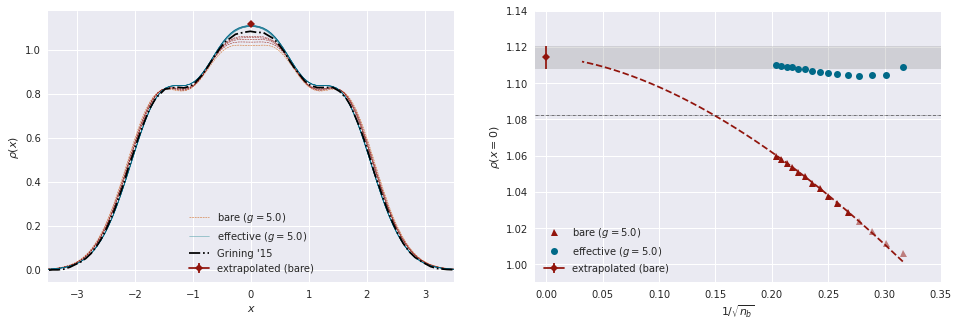

In [103]:
# Cutoff to be shown for comparison.
nb_energy = 14
n_part = (3,1)
coupling = 5.0


with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)

    nbs = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
    nbs_plotted = [24, 21, 18, 15, 12] # to be plotted.
    fit_cutoff = 13

    # Loop over all interaction types.
    for int_type in ['bare', 'effective_relative']:
        
        lab = label='bare' if int_type=='bare' else 'effective'
        lab = lab + ' ($g = {:.1f}$)'.format(coupling)

        # Get data.
        cnt = 0
        y = np.zeros(shape=(len(nbs),))
        for i, nb in enumerate(nbs):
            data = np.loadtxt("density_data/density_{:d}+{:d}_{:s}_nb={:d}_g={:.1f}.csv".format(*n_part, int_type, nb, coupling), delimiter=',')

            if nb in nbs_plotted:
                ax[0].plot(data[:,0], data[:,1], ls='--' if int_type=='bare' else '-',
                    marker='', lw=0.5, color=cmap[int_type](i/len(nbs_plotted)),
                    label='' if cnt else lab
                )
                cnt += 1

            index = data.shape[0]//2
            y[i] = data[index,1]
            
        # Plot convergence in lower panel.
        m = nbs<=fit_cutoff if int_type=='bare' else nbs >= 1000
        line = ax[1].plot(1/np.sqrt(nbs[m]), y[m], marker=marker[int_type], ls='', alpha=0.5, label='', color=cmap[int_type](4))
        line = ax[1].plot(1/np.sqrt(nbs[~m]), y[~m], marker=marker[int_type], ls='', zorder=5, label=lab, color=cmap[int_type](4))

        if int_type == "bare":
            fi = np.argwhere(nbs==fit_cutoff)[0][0]

            # Extrapolate the total density at x=0.
            # efunc = lambda nb, a, b, c: a + b/(nb**0.5) + c/nb
            efunc = lambda nb, a, b, c: a + b/(nb**c)

            index = data.shape[0]//2
            xfit = nbs[fi:]
            y = y[fi:]
            p, c = curve_fit(efunc, xfit, y)
            # print(x[index], " || ", p)

            sig = np.sqrt(c[0,0])
            for a in [ax[0], ax[1]]:
                a.errorbar(0, p[0], yerr=sig, marker='D', color=line[0].get_color(), label='extrapolated (bare)', markersize=5)
            ax[1].fill_between([-10,10], [p[0]-sig]*2, [p[0]+sig]*2, color='gray', alpha=0.25, lw=0)

            xf = np.linspace(10, 1000, 1000)
            ax[1].plot(1/np.sqrt(xf), efunc(xf, *p), ls='--', marker='', color=line[0].get_color())
            
            
        # Grining '15 benchmark.
    grin = pd.read_csv('benchmark_data/grining_3+1_g5.dat')
    grin_func = interp1d(grin['x'], grin['rho'])
    line = ax[0].plot(grin['x'], grin['rho'], label='Grining \'15', marker='', ls='-.', color='black')
    ax[1].axhline(grin_func(0), ls='-.', color=line[0].get_color(), marker='', lw=0.5)

    # ---

    ax[0].set_xlabel('$x$')
    ax[0].set_ylabel('$\\rho(x)$')
    ax[0].set_xlim(-3.5,3.5)
    ax[0].legend(loc='lower center')


    ax[1].set_xlabel('$1/\\sqrt{n_b}$')
    ax[1].set_xlim(-0.05, 0.35)

    ax[1].set_ylabel('$\\rho(x=0)$')
    ax[1].set_ylim(0.99, 1.14)

    ax[1].legend(loc='lower left')

    ax[1].set_xlim(-0.01, 0.25)
    ax[1].set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])